<a href="https://colab.research.google.com/github/harikrishnareddymallavarapu/Masters/blob/main/Masters_3_4_LDA_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle
pkl_file = open('drive/My Drive/Top-Ex/lda_data_lemmatized.pkl', 'rb')
data_lemmatized = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('drive/My Drive/Top-Ex/lda_id2word.pkl', 'rb')
id2word = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('drive/My Drive/Top-Ex/lda_corpus.pkl', 'rb')
corpus = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('drive/My Drive/Top-Ex/lda_model_list.pkl', 'rb')
lda_model_list = pickle.load(pkl_file)
pkl_file.close()

In [3]:
lda_model = lda_model_list[4]

In [4]:
j=0
for i in lda_model.show_topics(formatted=False,num_topics=lda_model.num_topics,num_words=len(lda_model.id2word)):
    print(i)
    j+=1
    if j ==10:
      break


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
topic1_list = lda_model.show_topics(formatted=False,num_topics=lda_model.num_topics,num_words=len(lda_model.id2word))[0][1]

In [6]:
import pandas as pd
df = pd.DataFrame(topic1_list, columns=["word", "top1_prob"])
df.head()

,word,top1_prob
0,say,0.047673
1,trump,0.031801
2,tell,0.011814
3,campaign,0.010807
4,report,0.009227


In [7]:
df.sort_values(by=['top1_prob'],ascending=False,inplace=True)
df.head()

,word,top1_prob
0,say,0.047673
1,trump,0.031801
2,tell,0.011814
3,campaign,0.010807
4,report,0.009227


In [8]:
lda_model.show_topics(formatted=False,num_topics=lda_model.num_topics,num_words=len(lda_model.id2word))[0][1]

[('say', 0.047673218),
 ('trump', 0.031801067),
 ('tell', 0.011813878),
 ('campaign', 0.010807389),
 ('report', 0.009226894),
 ('president', 0.00896101),
 ('question', 0.0081114415),
 ('email', 0.007948838),
 ('official', 0.0079049235),
 ('call', 0.007817763),
 ('comment', 0.007050243),
 ('claim', 0.0069309263),
 ('know', 0.0066574304),
 ('ask', 0.00661629),
 ('statement', 0.0064417413),
 ('reporter', 0.0060670758),
 ('medium', 0.0060229176),
 ('week', 0.005984522),
 ('news', 0.005771112),
 ('information', 0.0054758075),
 ('time', 0.005294138),
 ('investigation', 0.004823125),
 ('add', 0.004783883),
 ('press', 0.0046152784),
 ('speak', 0.004583701),
 ('release', 0.004480986),
 ('public', 0.0043927333),
 ('russian', 0.004344372),
 ('foreign', 0.0043227742),
 ('include', 0.004262957),
 ('twitter', 0.00408807),
 ('appear', 0.004082087),
 ('election', 0.0039912574),
 ('interview', 0.003949792),
 ('adviser', 0.0039450102),
 ('office', 0.0038743604),
 ('source', 0.003828785),
 ('security', 0

In [9]:
lda_model.get_term_topics("presidential", minimum_probability=0.000000001)

[(0, 0.0035180682), (6, 0.01110959)]

In [11]:
totalDF =pd.DataFrame(columns=["word", "top_prob",'Topic'])
for i in range(11):
  print(i)
  topic_list = lda_model.show_topics(formatted=False,num_topics=lda_model.num_topics,num_words=len(lda_model.id2word))[i][1]
  df = pd.DataFrame(topic_list, columns=["word", "top_prob"])
  df["Topic"]= i+1

  if totalDF.shape==0:
    totalDF = df
  else:
    totalDF= totalDF.append(df)


0
1
2
3
4
5
6
7
8
9
10


In [12]:
k = totalDF[totalDF.word.isin( ['aaa']) ]

In [13]:
k

,word,top_prob,Topic
20934,aaa,8.312794e-08,1
11582,aaa,3.805227e-07,2
3052,aaa,6.087578e-06,3
12092,aaa,1.878115e-07,4
14320,aaa,3.291041e-07,5
27834,aaa,7.034570e-08,6
21917,aaa,9.852008e-08,7
22285,aaa,5.740086e-08,8
24987,aaa,1.119022e-07,9
18257,aaa,7.846555e-08,10


In [14]:
totalDF = totalDF.pivot_table(index=["word"], 
                    columns='Topic', 
                    values='top_prob')

In [15]:
totalDF.reset_index(inplace=True)
totalDF.head()


Topic,word,1,2,3,4,5,6,7,8,9,10,11
0,aaa,8.312794e-08,3.805227e-07,6.087578e-06,1.878115e-07,3.291041e-07,7.034570e-08,9.852008e-08,5.740086e-08,1.119022e-07,7.846555e-08,1.968071e-07
1,aaaaaaaaaaaaah,7.639409e-08,1.188908e-07,7.292445e-08,1.269478e-07,1.297525e-07,6.503221e-08,9.671810e-08,4.532386e-08,1.106481e-07,5.932979e-08,1.447413e-07
2,aaaaaah,7.639439e-08,1.188956e-07,7.292731e-08,1.269588e-07,1.297602e-07,6.505648e-08,9.672200e-08,4.533713e-08,1.106506e-07,5.933410e-08,1.447565e-07
3,aaaah,7.639409e-08,1.188907e-07,7.292445e-08,1.269478e-07,1.297525e-07,6.503221e-08,9.671810e-08,4.532386e-08,1.106481e-07,5.932979e-08,1.447413e-07
4,aaaand,9.205382e-08,1.024646e-05,3.999230e-07,1.289498e-07,2.760186e-07,2.228887e-07,2.370257e-07,3.536761e-07,1.569070e-07,1.612210e-07,1.438317e-06


In [16]:
totalDF.columns

Index(['word', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='object', name='Topic')

In [18]:
topic_percs, wordid_topics, wordid_phivalues = lda_model[corpus[0]]

In [20]:
lda_model[corpus[0]]

([(0, 0.29099205),
  (1, 0.010907397),
  (2, 0.45017603),
  (4, 0.061370783),
  (5, 0.014272073),
  (7, 0.055152584),
  (9, 0.09239383)],
 [(0, [2, 9]),
  (1, [2, 0, 4, 7, 9, 1, 5]),
  (2, [2, 0, 4]),
  (3, [0, 6]),
  (4, [0, 2, 7, 9, 4, 1]),
  (5, [0, 9]),
  (6, [2, 9]),
  (7, [2, 9, 0, 5]),
  (8, [2, 7]),
  (9, [2, 0, 9, 7, 1]),
  (10, [4, 9]),
  (11, [0, 7, 2, 9, 1]),
  (12, [2, 9]),
  (13, [2, 0, 7, 9, 1]),
  (14, [2, 0, 9, 4]),
  (15, [2, 0, 9, 4]),
  (16, [0, 7]),
  (17, [2, 1, 4]),
  (18, [2, 0, 9, 5]),
  (19, [2, 7, 4, 9, 0, 5, 1]),
  (20, [2, 9, 0, 4, 5, 1]),
  (21, [0, 2, 4]),
  (22, [2, 9]),
  (23, [4]),
  (24, [2, 9, 0, 7]),
  (25, [2, 0, 7, 5, 1, 6]),
  (26, [4]),
  (27, [0, 4, 7, 9, 1]),
  (28, [9]),
  (29, [2, 9]),
  (30, [0, 2, 4]),
  (31, [9]),
  (32, [0, 9, 7, 5]),
  (33, [0, 2, 7, 9, 3, 1]),
  (34, [0, 9]),
  (35, [2]),
  (36, [2, 0]),
  (37, [0, 7, 2]),
  (38, [2, 9, 0, 5, 7]),
  (39, [0, 2, 7, 9, 4, 1, 5]),
  (40, [0, 6]),
  (41, [7, 2, 0, 9]),
  (42, [0, 2, 9, 7, 

In [21]:
gamma, _ = lda_model.inference(corpus)
topics = gamma / gamma.sum(axis=1)[:,None]

In [22]:
topics = pd.DataFrame(topics)
topics.reset_index(drop=True)
topics.rename(columns = lambda x: 'Topic_'+str(x+1).zfill(2), inplace=True)
topics.head()

,Topic_01,Topic_02,Topic_03,Topic_04,Topic_05,Topic_06,Topic_07,Topic_08,Topic_09,Topic_10,Topic_11
0,0.290998,0.010906,0.450176,0.005970,0.061371,0.014272,0.008211,0.055154,0.005457,0.092393,0.005092
1,0.058792,0.002780,0.009205,0.431409,0.001869,0.102680,0.018864,0.058535,0.009905,0.275659,0.030303
2,0.020495,0.157279,0.050228,0.017358,0.015984,0.086818,0.002245,0.043450,0.002179,0.010960,0.593004
3,0.174913,0.012685,0.036574,0.041777,0.010217,0.084963,0.197679,0.412116,0.005444,0.018977,0.004655
4,0.028872,0.145885,0.064897,0.074325,0.158659,0.171485,0.006119,0.210629,0.004514,0.019160,0.115456


In [24]:
article1 = pd.read_pickle('drive/My Drive/Top-Ex/articles_sample.pkl')

In [29]:
article1.reset_index(inplace=True)
article1.head()

,index,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,44480,47352,66559,Trump says his ’massive’ tax plan is coming ne...,Business Insider,Bob Bryan,2017-04-22,2017.0,4.0,NaN,’ ’ ’ President Donald Trump said that he e...
1,8195,61514,83936,Chicago police have ’no regard’ for minority l...,Fox News,NaN,2016-04-13,2016.0,4.0,https://web.archive.org/web/20160414011639/htt...,Police in Chicago have ”no regard for the san...
2,10464,113926,168759,A Concussion Can Lead To Sleep Problems That L...,NPR,Jon Hamilton,2016-04-27,2016.0,4.0,http://www.npr.org/sections/health-shots/2016/...,People who sustain a concussion or a more seve...
3,19198,72606,106668,Trump: I Was Just Joking When I Made Crude Co...,Buzzfeed News,Andrew Kaczynski,2016-03-29,2016.0,3.0,https://web.archive.org/web/20160329002256/htt...,’You can watch the interview here:’] Trump’s c...
4,17793,71201,102160,"Beyoncé Dropped Out Of Coachella, Because Duh",Buzzfeed News,Alanna Bennett,2017-02-24,2017.0,2.0,https://web.archive.org/web/20170224044447/htt...,"’ It has happened, friends: Beyoncé has offici..."


In [31]:
article1=article1[['title','content']]

In [32]:
finalData = pd.concat([article1,topics], axis=1,sort=False)
finalData.head()

,title,content,Topic_01,Topic_02,Topic_03,Topic_04,Topic_05,Topic_06,Topic_07,Topic_08,Topic_09,Topic_10,Topic_11
0,Trump says his ’massive’ tax plan is coming ne...,’ ’ ’ President Donald Trump said that he e...,0.290998,0.010906,0.450176,0.005970,0.061371,0.014272,0.008211,0.055154,0.005457,0.092393,0.005092
1,Chicago police have ’no regard’ for minority l...,Police in Chicago have ”no regard for the san...,0.058792,0.002780,0.009205,0.431409,0.001869,0.102680,0.018864,0.058535,0.009905,0.275659,0.030303
2,A Concussion Can Lead To Sleep Problems That L...,People who sustain a concussion or a more seve...,0.020495,0.157279,0.050228,0.017358,0.015984,0.086818,0.002245,0.043450,0.002179,0.010960,0.593004
3,Trump: I Was Just Joking When I Made Crude Co...,’You can watch the interview here:’] Trump’s c...,0.174913,0.012685,0.036574,0.041777,0.010217,0.084963,0.197679,0.412116,0.005444,0.018977,0.004655
4,"Beyoncé Dropped Out Of Coachella, Because Duh","’ It has happened, friends: Beyoncé has offici...",0.028872,0.145885,0.064897,0.074325,0.158659,0.171485,0.006119,0.210629,0.004514,0.019160,0.115456


In [52]:

filehandler = open("drive/My Drive/Top-Ex/article_topic.pkl","wb")
pickle.dump(finalData,filehandler)
filehandler.close()

In [33]:
article1.content.iloc[0]

'’  ’ ’   President Donald Trump said that he expects to release his plan   for a tax overhaul on ”Wednesday or shortly thereafter,” in an   interview with the Associated Press on Wednesday. ’ ’   Trump told the AP that the plan would include a ”massive” tax cut   for corporations and businesses. ’ ’   During the campaign, Trump said that  to 15% from its   current 35% level. ’ ”   Since that time, however,  could be much higher   than that under Trump’s plan. ” ’   The statement comes just as hope for a quick resolution to   tax reform began to fade. The president  that he was going to   release something ”phenomenal in terms of tax” in ”two or three   weeks.” Additionally, Treasury Secretary Steven Mnuchin said that   he wanted  by the   congressional recess in August, but  ’ ’   In response to the news, stocks popped with the Dow Jones   industrial average jumping a little over 30 points to 20, 578   as of 2:23 p. m. ET. ’ ’President Donald Trump said that he expects to. ..’ ’’ ’’ ’

In [34]:
%%capture
# Run in python console
import nltk; 
nltk.download('stopwords')

# Run in terminal or command prompt
!python3 -m spacy download en
import gensim

In [35]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import spacy

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [36]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

In [37]:

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts,bigram_mod):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    nlp = spacy.load('en', disable=['parser', 'ner'])
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','trump','donald','say','hillary','clinton','do','united','state','the','day','news','that','have','however','year'])

In [38]:
import re
def createCorpusDict(dataFrame):
    #cleanse the text
    dataFrame.content = dataFrame.content.astype(str)
    data = dataFrame.content.values.tolist()
    data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
    # Remove new line characters
    data = [re.sub('\s+', ' ', sent) for sent in data]
    # Remove distracting single quotes
    data = [re.sub("\'", "", sent) for sent in data]
    data_words = list(sent_to_words(data))
    
    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
    trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)

    data_words_nostops = remove_stopwords(data_words)

    # Form Bigrams
    data_words_bigrams = make_bigrams(data_words_nostops,bigram_mod)

    # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
    # python3 -m spacy download en


    # Do lemmatization keeping only noun, adj, vb, adv
    data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

    #cleanse the dictionary
    dictionary = corpora.Dictionary(data_lemmatized)
    # Create Corpus
    texts = data_lemmatized
    # Term Document Frequency
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    return corpus,dictionary,data_lemmatized

In [39]:
corpus_1,dictionary_1,data_lemmatized_1 = createCorpusDict(article1[0:1])

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [40]:
totalDF = totalDF.reset_index()
totalDF.head()

Topic,index,word,1,2,3,4,5,6,7,8,9,10,11
0,0,aaa,8.312794e-08,3.805227e-07,6.087578e-06,1.878115e-07,3.291041e-07,7.034570e-08,9.852008e-08,5.740086e-08,1.119022e-07,7.846555e-08,1.968071e-07
1,1,aaaaaaaaaaaaah,7.639409e-08,1.188908e-07,7.292445e-08,1.269478e-07,1.297525e-07,6.503221e-08,9.671810e-08,4.532386e-08,1.106481e-07,5.932979e-08,1.447413e-07
2,2,aaaaaah,7.639439e-08,1.188956e-07,7.292731e-08,1.269588e-07,1.297602e-07,6.505648e-08,9.672200e-08,4.533713e-08,1.106506e-07,5.933410e-08,1.447565e-07
3,3,aaaah,7.639409e-08,1.188907e-07,7.292445e-08,1.269478e-07,1.297525e-07,6.503221e-08,9.671810e-08,4.532386e-08,1.106481e-07,5.932979e-08,1.447413e-07
4,4,aaaand,9.205382e-08,1.024646e-05,3.999230e-07,1.289498e-07,2.760186e-07,2.228887e-07,2.370257e-07,3.536761e-07,1.569070e-07,1.612210e-07,1.438317e-06


In [41]:
totalDF['req'] = totalDF.word.apply(lambda x: True if x in data_lemmatized_1[0] else False )

In [42]:
totalDF[totalDF.req==True]

Topic,index,word,1,2,3,4,5,6,7,8,9,10,11,req
761,761,additionally,7.640570e-08,1.189131e-07,1.416548e-04,1.269813e-07,1.297686e-07,6.504386e-08,9.673192e-08,4.532959e-08,1.106631e-07,2.667894e-04,1.447989e-07,True
6570,6570,begin,1.000875e-03,2.831266e-03,8.357598e-04,1.927995e-03,1.568280e-03,1.248699e-03,1.268847e-03,1.702374e-03,2.888461e-03,8.147046e-04,1.684313e-03,True
10455,10455,business,1.844977e-03,1.189021e-07,7.583625e-03,1.269628e-07,8.379332e-04,6.503866e-08,9.672803e-08,3.476951e-04,1.106583e-07,2.035957e-04,1.447513e-07,True
11002,11002,campaign,1.080739e-02,1.188982e-07,7.293040e-08,1.269563e-07,1.297634e-07,6.503731e-08,1.896233e-02,4.532764e-08,1.106634e-07,5.933506e-08,1.447521e-07,True
15002,15002,come,3.500628e-03,7.472885e-03,2.228417e-03,9.135724e-04,1.046670e-03,1.462619e-03,3.230708e-03,1.220610e-02,3.283375e-03,3.063423e-03,4.057310e-04,True
15751,15751,congressional,9.289553e-04,1.188972e-07,7.293263e-08,1.269552e-07,1.297576e-07,6.503656e-08,1.085468e-03,4.532636e-08,1.106561e-07,6.646747e-04,1.447483e-07,True
16581,16581,corporation,7.639775e-08,1.188965e-07,2.389892e-04,1.269556e-07,1.297677e-07,6.503659e-08,9.672380e-08,4.532673e-08,1.106527e-07,9.728549e-05,1.447469e-07,True
16795,16795,could,3.207954e-04,7.506385e-04,7.293351e-08,1.191963e-04,1.297670e-07,6.504000e-08,9.672822e-08,2.151264e-03,1.106611e-07,7.156237e-05,1.287872e-04,True
17994,17994,current,3.856370e-04,9.146309e-05,1.108549e-03,1.269585e-07,3.766206e-05,1.197739e-03,4.635448e-04,4.532889e-08,1.218174e-04,1.422634e-03,1.447548e-07,True
18076,18076,cut,7.640138e-08,7.804135e-04,5.346556e-03,1.047477e-04,1.757105e-04,6.503915e-08,4.160248e-04,7.078186e-04,4.612589e-04,5.933629e-08,2.811938e-04,True


In [43]:
corpus_1[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 2),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 3),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 2),
 (32, 1),
 (33, 1),
 (34, 4),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 4),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1)]

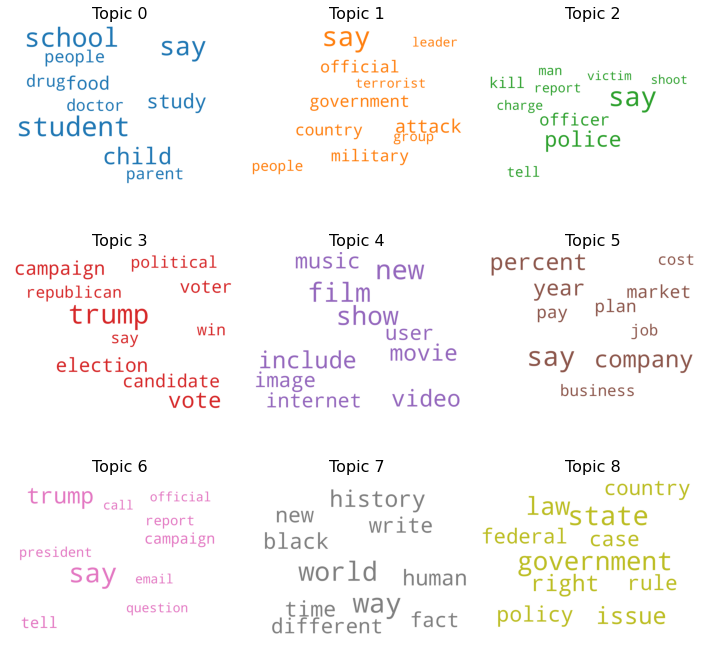

In [49]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=30,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

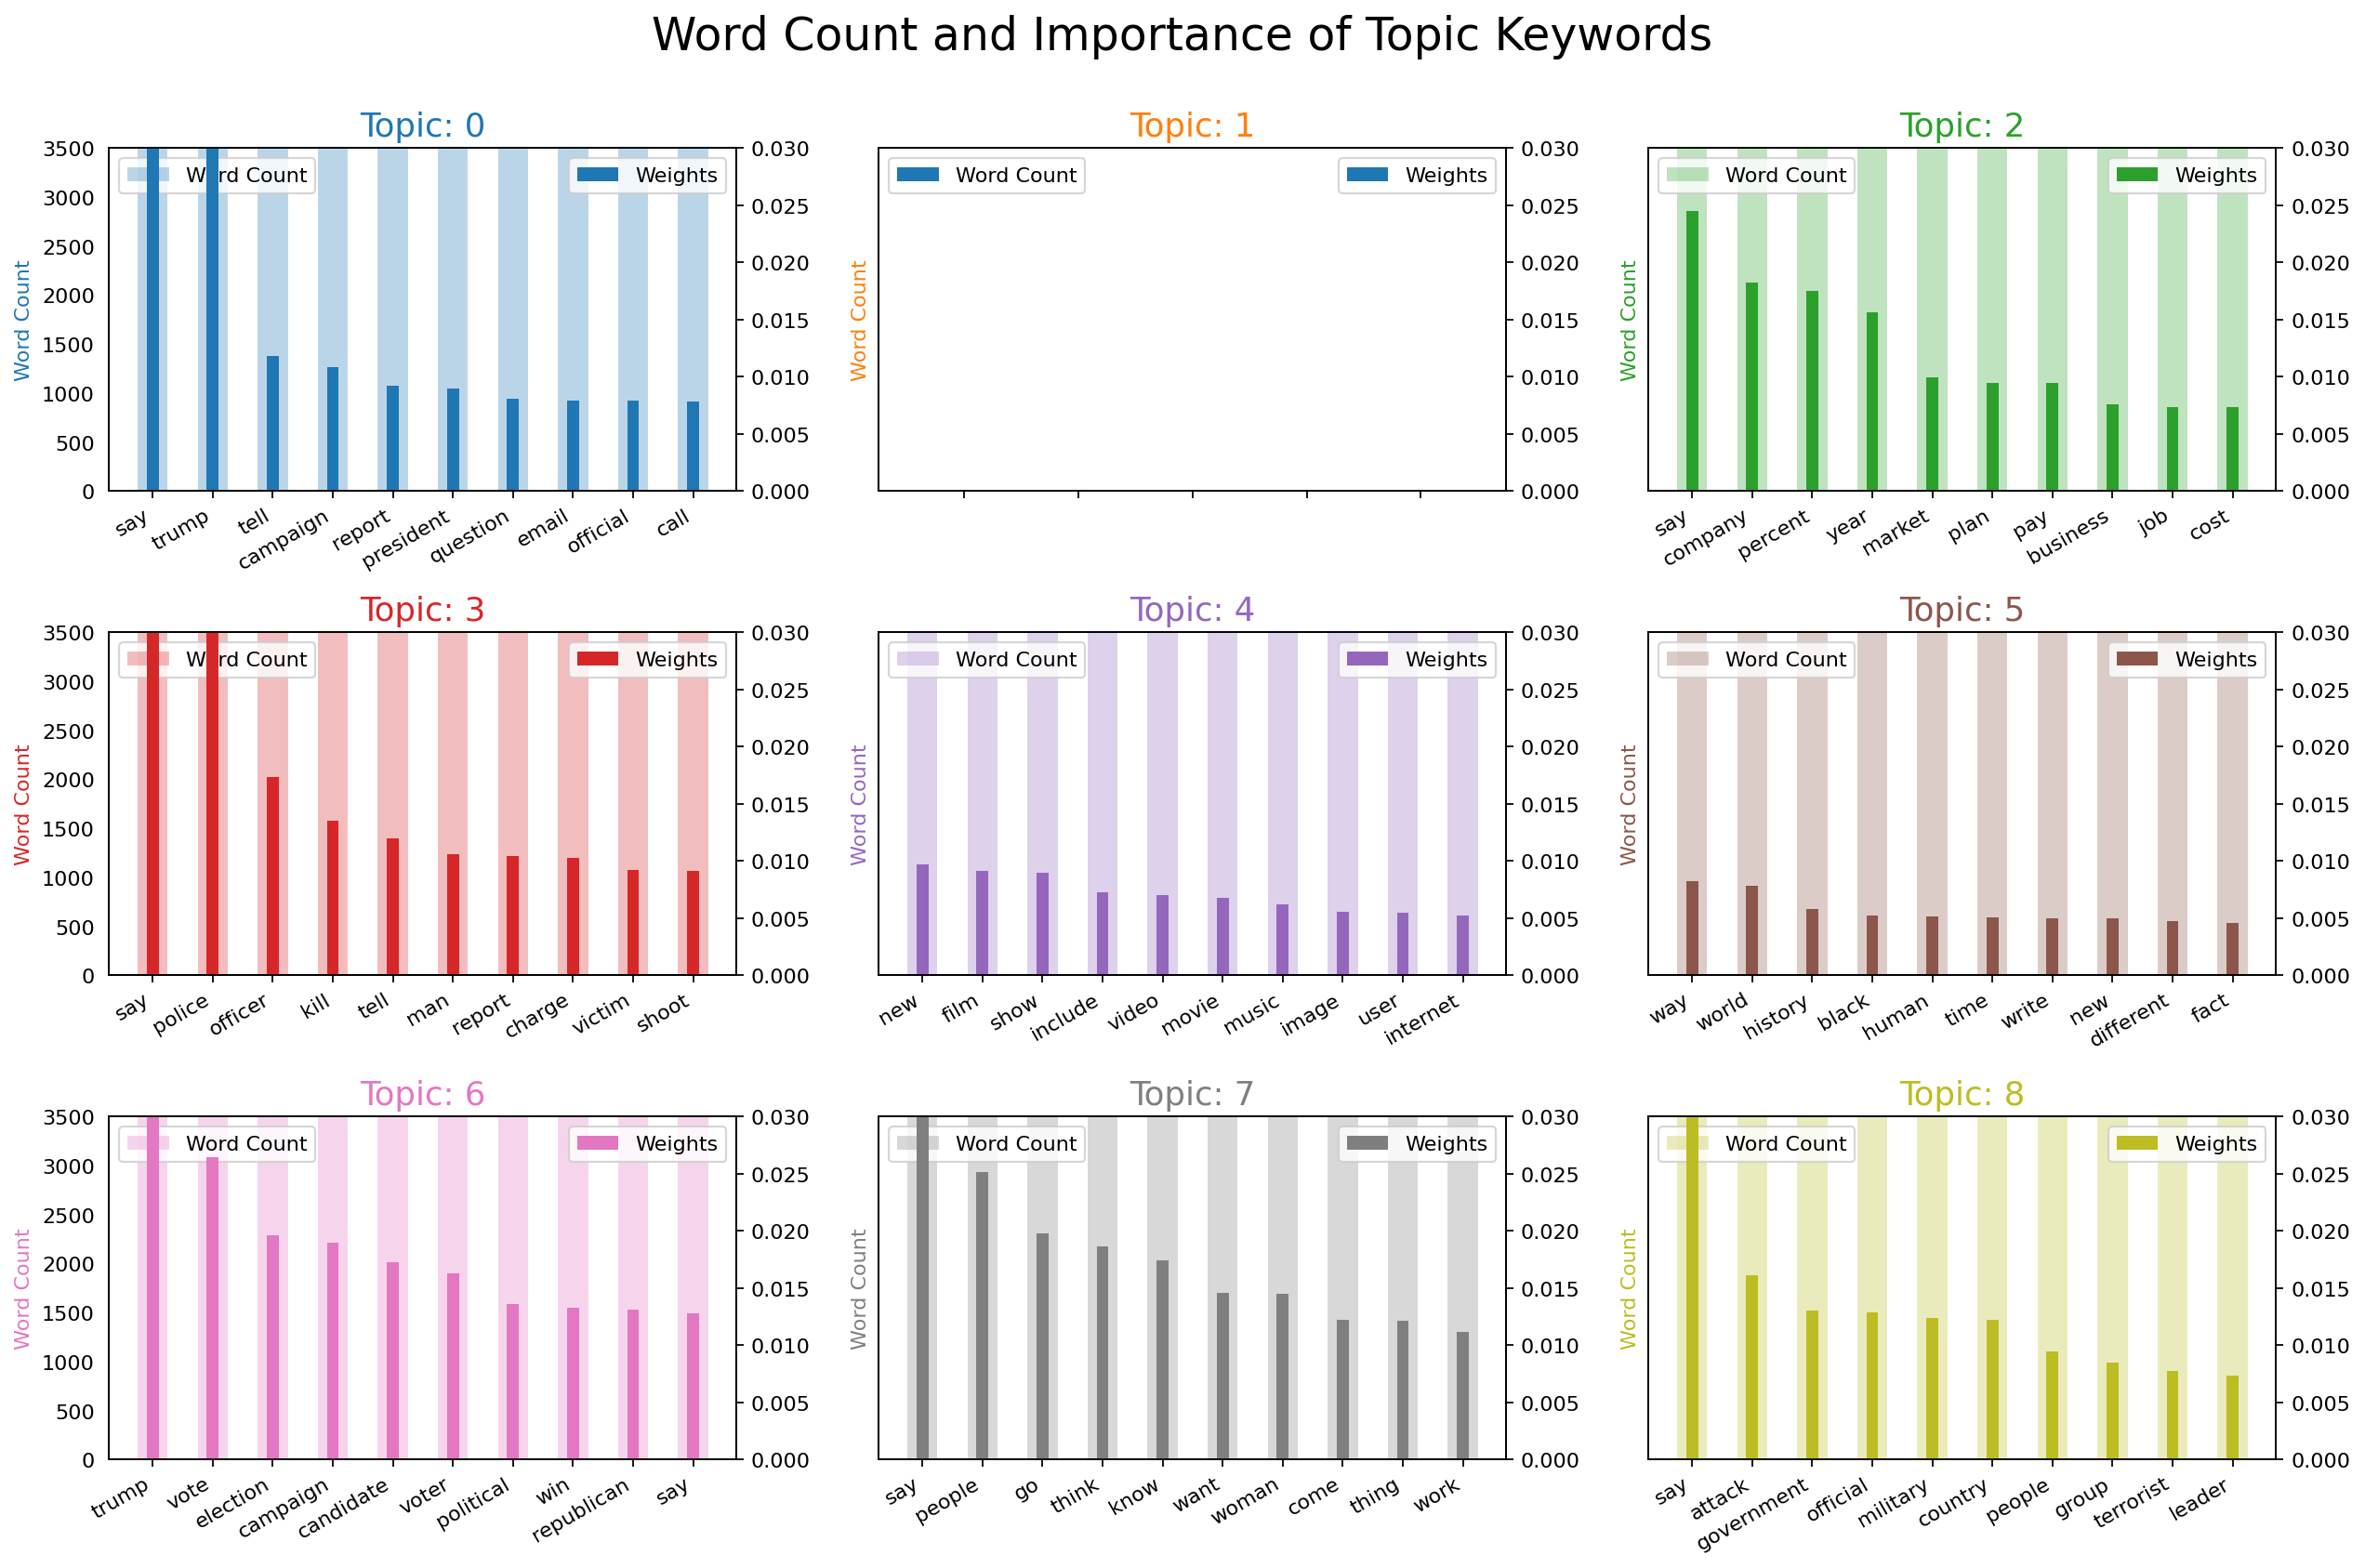

In [45]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_lemmatized for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 3, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()


In [46]:
mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]
mycolors = ['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf'
 ,'#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

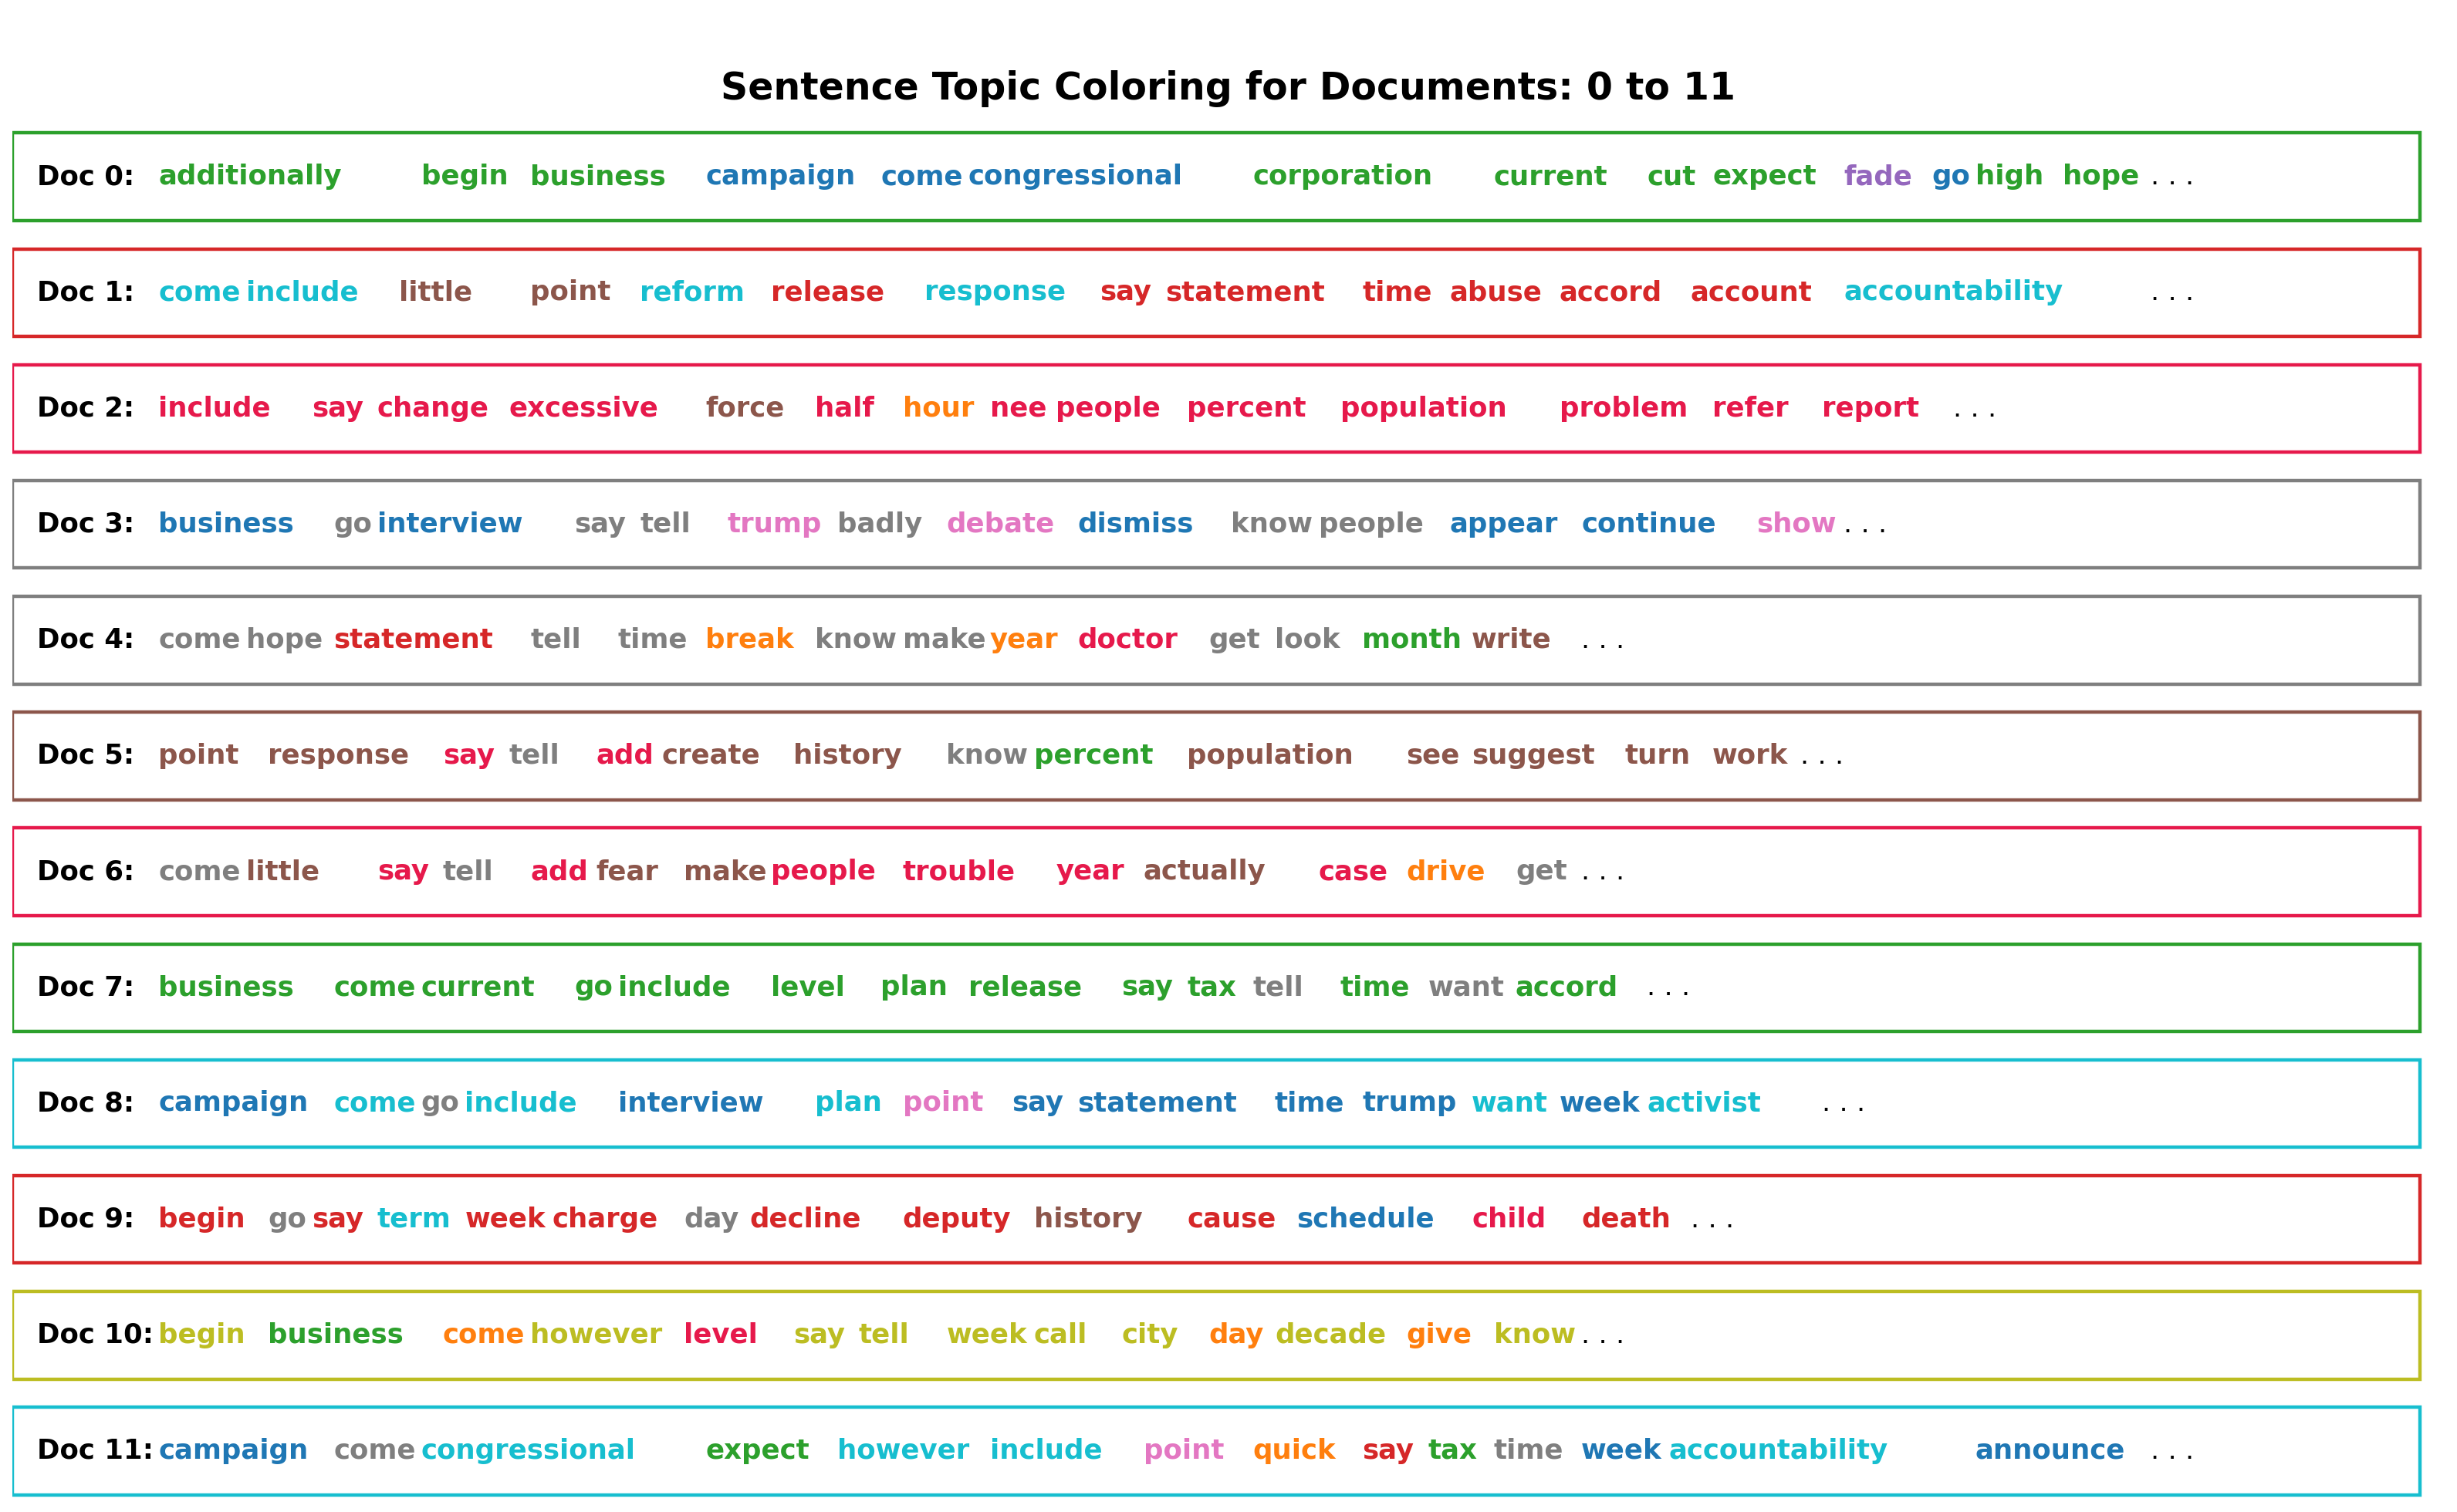

In [47]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]
    mycolors = ['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf'
 ,'#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()  

In [48]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
# arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
mycolors = ['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf'
 ,'#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
    
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
# plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.096s...
[t-SNE] Computed neighbors for 50000 samples in 18.029s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities for sa

In [50]:
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1],color=[mycolors[i] for i in topic_num])
show(plot)

In [51]:
data_lemmatized_1

[['say',
  'expect',
  'release',
  'plan',
  'tax',
  'overhaul',
  'shortly',
  'thereafter',
  'interview',
  'tell',
  'plan',
  'would',
  'include',
  'massive',
  'tax',
  'cut',
  'corporation',
  'business',
  'campaign',
  'say',
  'current',
  'level',
  'time',
  'could',
  'much',
  'high',
  'plan',
  'statement',
  'come',
  'hope',
  'quick',
  'resolution',
  'tax',
  'reform',
  'begin',
  'fade',
  'go',
  'release',
  'phenomenal',
  'term',
  'tax',
  'week',
  'additionally',
  'say',
  'want',
  'congressional',
  'recess',
  'response',
  'stock',
  'pop',
  'jump',
  'little',
  'point',
  'president',
  'say',
  'expect']]

In [ ]:
# https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#11.-Sentence-Chart-Colored-by-Topic